In [1]:
import sys

sys.path.insert(
    1, "..\\utilities\\"
)  # adds utilities folder to path so we can import modules from it, won't be needed after packaging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import loading_utils as load

In [43]:
participant_id = 200
data_dir = './results'
data_path = os.path.join(data_dir,str(participant_id)+'_full_data.csv')

data_df = pd.read_csv(data_path)

In [44]:
def mark_trials(data_df):
    """
    Function for marking phases in the experiment.
    Input:
    data_df - dataframe with experiment data from one recording of one participant
    
    Returns:
    data_df - dataframe from input with an added column 'Phase' with positions: Adaptation, pre-stim, stim, post-stim and Transition
    """
    data_df["Phase new"] = ["N/A"] * len(data_df)
    data_df["Trial type"] = ["N/A"] * len(data_df)
    data_df["Trial no"] = ["N/A"] * len(data_df)
    data_df["Trial time Sec"] = ["N/A"] * len(data_df)
    trial_number = 1
    for session_id in data_df['Session id'].unique():
        eye = data_df['Eye'][data_df['Session id']==session_id].unique()[0]
        for seq_id in sorted(data_df["Sequence index"][data_df['Session id']==session_id].unique())[1::]:
            if eye =='L':
                stim = data_df['Excitation label - Left'][(data_df['Sequence index'] == seq_id)
                                                          &(data_df['Session id'] == session_id) 
                                                          &(data_df['Phase']=='stim')].unique()[0]
            else:
                stim = data_df['Excitation label - Right'][(data_df['Sequence index'] == seq_id)
                                                          &(data_df['Session id'] == session_id) 
                                                          &(data_df['Phase']=='stim')].unique()[0]
                
            seq_start_time = data_df["Sequence time Sec"][
                (data_df["Session id"] == session_id)
                & (data_df["Sequence index"] == seq_id)
            ].min()
            seq_end_time = data_df["Overall time Sec"][
                (data_df["Session id"] == session_id)
                & (data_df["Sequence index"] == seq_id)
            ].max()
            stim_start_time = data_df["Overall time Sec"][
                (data_df["Session id"] == session_id)
                & (data_df["Sequence index"] == seq_id)
                & (data_df["Sequence time Sec"] == seq_start_time)
            ].min()

            data_df.loc[
                (data_df["Session id"] == session_id)
                & (data_df["Overall time Sec"] >= stim_start_time - 1)
                & (data_df["Overall time Sec"] < stim_start_time),
                "Phase new",
            ] = "pre-stim"
            
            data_df.loc[
                (data_df["Session id"] == session_id)
                & (data_df["Overall time Sec"] >= stim_start_time - 1)
                & (data_df["Overall time Sec"] <= seq_end_time),
                "Trial type",
            ] = stim
            
            
            data_df.loc[
                (data_df["Session id"] == session_id)
                & (data_df["Overall time Sec"] >= stim_start_time - 1)
                & (data_df["Overall time Sec"] <= seq_end_time),
                "Trial no",
            ] = trial_number
            trial_number+=1

            data_df.loc[
                (data_df["Session id"] == session_id)
                & (data_df["Overall time Sec"] >= stim_start_time - 1)
                & (data_df["Overall time Sec"] <= seq_end_time),
                "Trial time Sec",
            ] = data_df.loc[
                (data_df["Session id"] == session_id)
                & (data_df["Overall time Sec"] >= stim_start_time - 1)
                & (data_df["Overall time Sec"] <= seq_end_time),
                "Overall time Sec",
            ]-stim_start_time
            
            if eye=='L':
                data_df.loc[
                    (data_df["Session id"] == session_id)
                    &(data_df["Sequence index"] == seq_id)
                    & (data_df["Excitation label - Left"] != "baseline"),
                    "Phase new",
                ] = "stim"
            else:
                data_df.loc[
                    (data_df["Session id"] == session_id)
                    &(data_df["Sequence index"] == seq_id)
                    & (data_df["Excitation label - Right"] != "baseline"),
                    "Phase new",
                ] = "stim"
            
            
        data_df.loc[
                (data_df["Sequence index"] == 1) & (data_df["Phase"] == "N/A"),
                "Phase new",
            ] = "Adaptation"
        data_df.loc[(data_df["Session id"] == session_id) & (data_df["Phase new"] == "N/A"), "Phase new"] = "post-stim"
    return data_df

In [45]:
data_df=mark_trials(data_df)

In [46]:
data_df

,Unnamed: 0,Overall time Sec,Sequence time Sec,Experiment state,Sequence index,Sequences count,Excitation index,Excitation label - Left,Excitation label - Right,Left - Is found,...,Right - PoxY Px,Right - Distance from focus,Right - Leds temp,Eye,Phase,Session id,Phase new,Trial type,Trial no,Trial time Sec
0,0,0.005,0.005,Active,1,26,2.0,dark,baseline,False,...,NaN,NaN,NaN,R,Adaptation,0,post-stim,N/A,N/A,N/A
1,1,0.011,0.012,Active,1,26,2.0,dark,baseline,False,...,NaN,NaN,NaN,R,Adaptation,0,post-stim,N/A,N/A,N/A
2,2,0.013,0.014,Active,1,26,2.0,dark,baseline,False,...,585.06671,59.19524,NaN,R,Adaptation,0,post-stim,N/A,N/A,N/A
3,3,0.017,0.018,Active,1,26,2.0,dark,baseline,True,...,NaN,NaN,NaN,R,Adaptation,0,post-stim,N/A,N/A,N/A
4,4,0.037,0.038,Active,1,26,2.0,dark,baseline,False,...,585.48529,59.45891,NaN,R,Adaptation,0,post-stim,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018496,42735,731.016,19.366,Active,26,26,3852.0,dark,baseline,True,...,NaN,NaN,NaN,R,pre-stim,28,post-stim,lms,579,19.36
1018497,42736,731.017,19.366,Active,26,26,3852.0,dark,baseline,False,...,555.55981,109.41843,NaN,R,pre-stim,28,post-stim,lms,579,19.361
1018498,42737,731.051,19.401,Active,26,26,3852.0,dark,baseline,True,...,555.05872,110.40439,NaN,R,pre-stim,28,post-stim,lms,579,19.395
1018499,42738,731.085,19.434,Active,26,26,3852.0,dark,baseline,True,...,554.46704,110.61753,NaN,R,pre-stim,28,post-stim,lms,579,19.429


In [49]:
data_df.to_csv('./results/dfs_marked/'+str(participant_id)+'_full_data.csv')

In [50]:
data_df.columns

Index(['Unnamed: 0', 'Overall time Sec', 'Sequence time Sec',
       'Experiment state', 'Sequence index', 'Sequences count',
       'Excitation index', 'Excitation label - Left',
       'Excitation label - Right', 'Left - Is found', 'Left - Size Mm',
       'Left - Area Mm', 'Left - RadiusA Px', 'Left - RadiusB Px',
       'Left - PosX Px', 'Left - PoxY Px', 'Left - Distance from focus',
       'Left - Leds temp', 'Right - Is found', 'Right - Size Mm',
       'Right - Area Mm', 'Right - RadiusA Px', 'Right - RadiusB Px',
       'Right - PosX Px', 'Right - PoxY Px', 'Right - Distance from focus',
       'Right - Leds temp', 'Eye', 'Phase', 'Session id', 'Phase new',
       'Trial type', 'Trial no', 'Trial time Sec'],
      dtype='object')

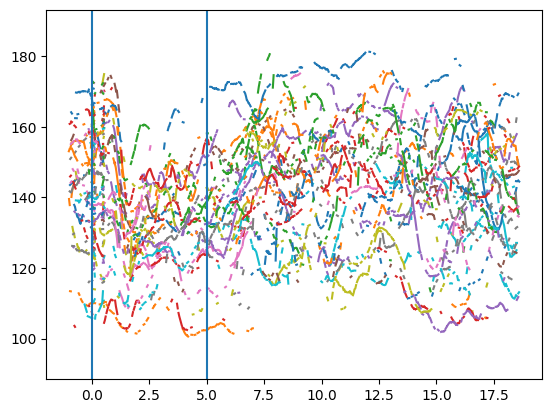

In [58]:
for i in data_df['Trial no'][data_df['Trial type']=='s'].unique():
    plt.plot(data_df['Trial time Sec'][(data_df['Trial type']=='s') &(data_df['Trial no']==i) ],data_df['Right - RadiusB Px'][(data_df['Trial type']=='s') &(data_df['Trial no']==i) ])
plt.axvline(x=0)
plt.axvline(x=5)